# Import all the required libraries

---



In [119]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [120]:
START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [121]:
data = load_data('TCS.NS')
df=data

df.columns = [header_pos[0] for header_pos in df.columns]
df = df.reset_index()
df.head()

[*********************100%***********************]  1 of 1 completed

,index,Date,Adj Close,Close,High,Low,Open,Volume
0,0,2010-01-04,292.219757,375.825012,379.450012,374.524994,377.399994,1963682
1,1,2010-01-05,292.297455,375.924988,379.774994,373.274994,377.500000,2014488
2,2,2010-01-06,285.688477,367.424988,376.100006,366.500000,375.924988,3349176
3,3,2010-01-07,277.738159,357.200012,369.700012,355.500000,367.750000,6474892
4,4,2010-01-08,272.062103,349.899994,359.250000,348.250000,358.000000,6048178


In [122]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,index,Close,High,Low,Open,Volume
0,0,375.825012,379.450012,374.524994,377.399994,1963682
1,1,375.924988,379.774994,373.274994,377.500000,2014488
2,2,367.424988,376.100006,366.500000,375.924988,3349176
3,3,357.200012,369.700012,355.500000,367.750000,6474892
4,4,349.899994,359.250000,348.250000,358.000000,6048178


Visualizing Closing Price

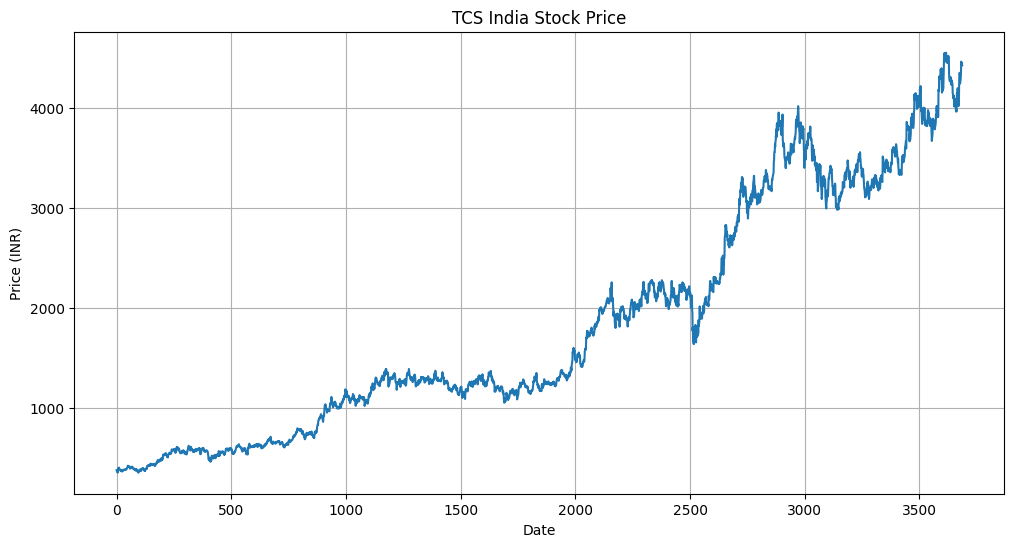

In [123]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [124]:
df

,index,Close,High,Low,Open,Volume
0,0,375.825012,379.450012,374.524994,377.399994,1963682
1,1,375.924988,379.774994,373.274994,377.500000,2014488
2,2,367.424988,376.100006,366.500000,375.924988,3349176
3,3,357.200012,369.700012,355.500000,367.750000,6474892
4,4,349.899994,359.250000,348.250000,358.000000,6048178
...,...,...,...,...,...,...
3682,3682,4464.049805,4489.000000,4360.000000,4400.799805,3746747
3683,3683,4445.500000,4465.000000,4412.750000,4453.000000,1842087
3684,3684,4452.149902,4469.399902,4415.549805,4430.450195,2066639
3685,3685,4432.549805,4493.799805,4412.100098,4426.149902,2087828


# Plotting moving averages of 100 day

---



In [125]:
ma100 = df.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
3682    4275.896497
3683    4278.511995
3684    4281.341492
3685    4283.882488
3686    4285.001492
Name: Close, Length: 3687, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

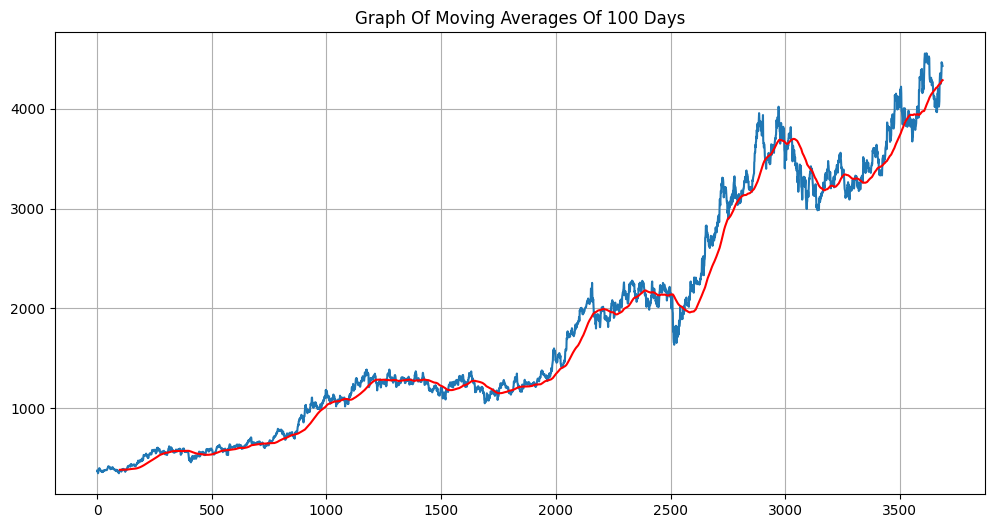

In [126]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [127]:
ma200 = df.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
3682    4106.316495
3683    4107.796495
3684    4109.556744
3685    4111.203492
3686    4112.699244
Name: Close, Length: 3687, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

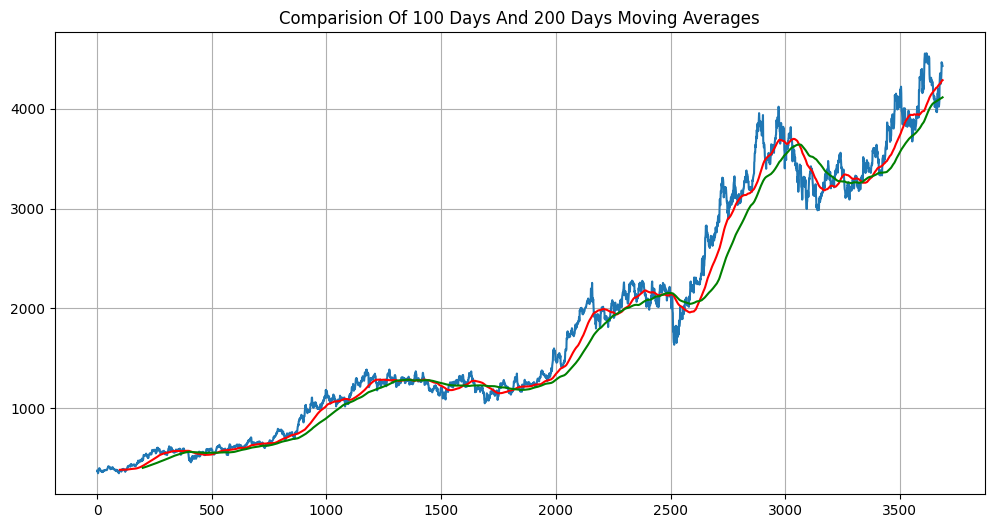

In [128]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [129]:
df.shape

(3687, 6)

# Spliting the dataset into training (70%) and testing (30%) set

In [130]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2580, 7)
(1107, 7)


In [131]:
train.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,292.219757,375.825012,379.450012,374.524994,377.399994,1963682
1,2010-01-05,292.297455,375.924988,379.774994,373.274994,377.500000,2014488
2,2010-01-06,285.688477,367.424988,376.100006,366.500000,375.924988,3349176
3,2010-01-07,277.738159,357.200012,369.700012,355.500000,367.750000,6474892
4,2010-01-08,272.062103,349.899994,359.250000,348.250000,358.000000,6048178


In [132]:
test.head()

,Date,Adj Close,Close,High,Low,Open,Volume
2580,2020-06-25,1864.792480,2016.099976,2060.000000,2009.250000,2035.000000,3043931
2581,2020-06-26,1959.831665,2118.850098,2132.000000,2019.949951,2025.000000,6300722
2582,2020-06-29,1943.922119,2101.649902,2127.600098,2091.300049,2108.000000,3076341
2583,2020-06-30,1925.885864,2082.149902,2111.899902,2075.050049,2100.000000,3071725
2584,2020-07-01,1935.042969,2092.050049,2113.949951,2079.500000,2079.699951,2503466


# Using MinMax scaler for normalization of the dataset

---



In [133]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [134]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [135]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.01671754],
       [0.01606246],
       [0.01251195],
       ...,
       [0.87860127],
       [0.8738061 ],
       [0.8851258 ]])

In [140]:
x_train = []
y_train = [] 

n = 30

for i in range(n, data_training_array.shape[0]):
    x_train.append(data_training_array[i-n: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [141]:
x_train.shape

(2550, 30, 1)

# ML Model (LSTM)

---



In [142]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [143]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [144]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 30, 50)            10400     
                                                                 
 dropout_12 (Dropout)        (None, 30, 50)            0         
                                                                 
 lstm_13 (LSTM)              (None, 30, 60)            26640     
                                                                 
 dropout_13 (Dropout)        (None, 30, 60)            0         
                                                                 
 lstm_14 (LSTM)              (None, 30, 80)            45120     
                                                                 
 dropout_14 (Dropout)        (None, 30, 80)            0         
                                                                 
 lstm_15 (LSTM)              (None, 120)              

# Training the model

---



In [145]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 5)

Epoch 1/5
80/80 [==============================] - 25s 262ms/step - loss: 0.0355 - mean_absolute_error: 0.1247
Epoch 2/5
80/80 [==============================] - 22s 280ms/step - loss: 0.0084 - mean_absolute_error: 0.0645
Epoch 3/5
80/80 [==============================] - 24s 300ms/step - loss: 0.0076 - mean_absolute_error: 0.0601
Epoch 4/5
80/80 [==============================] - 18s 227ms/step - loss: 0.0065 - mean_absolute_error: 0.0565
Epoch 5/5
80/80 [==============================] - 19s 241ms/step - loss: 0.0057 - mean_absolute_error: 0.0530


In [157]:
model.save('keras_model.h5')

In [168]:
test_close.shape

(1107, 1)

In [169]:
past_100_days = pd.DataFrame(train_close[-30:])

In [170]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [171]:
#final_df = past_100_days.append(test_df, ignore_index = True)
final_df = pd.concat([past_100_days, test_df], ignore_index = True)

In [172]:
final_df.head()

,0
0,1925.650024
1,1891.099976
2,1865.199951
3,1872.099976
4,1903.000000


In [173]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02283893],
       [0.00978541],
       [0.        ],
       ...,
       [0.9635597 ],
       [0.96225635],
       [0.96032946]])

In [174]:
input_data.shape

(1137, 1)

# Testing the model

---



In [175]:
x_test = []
y_test = []

n = 30

for i in range(n, input_data.shape[0]):
   x_test.append(input_data[i-n: i])
   y_test.append(input_data[i, 0])

In [176]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1107, 30, 1)
(1107,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [177]:
# Making predictions

y_pred = model.predict(x_test)

35/35 [==============================] - 4s 113ms/step


In [178]:
y_pred.shape

(1107, 1)

In [179]:
y_test

array([0.05442423, 0.05846683, 0.08542394, ..., 0.9635597 , 0.96225635,
       0.96032946])

In [180]:
y_pred

array([[0.04996588],
       [0.05024079],
       [0.05054461],
       ...,
       [0.72869533],
       [0.7326046 ],
       [0.7367801 ]], dtype=float32)

In [181]:
scaler.scale_

array([0.00037781])

In [182]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

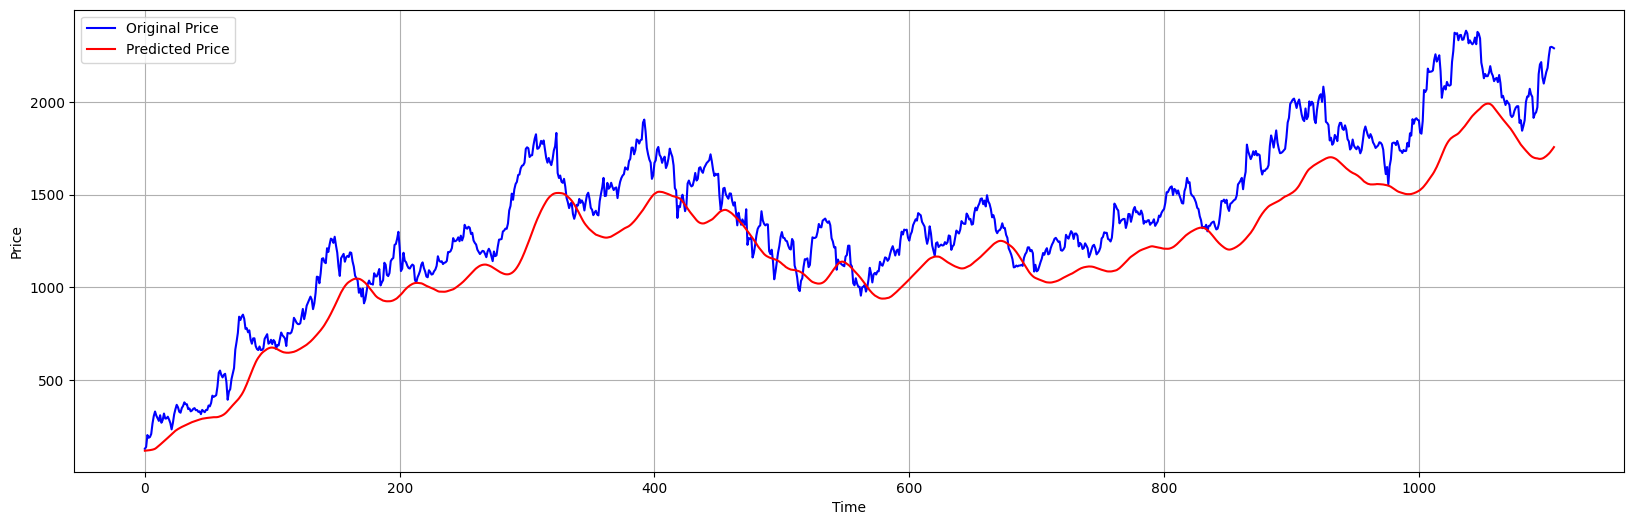

In [184]:
plt.figure(figsize = (20,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [185]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 14.39%


Calculation of R2 score

In [186]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.720097326017717


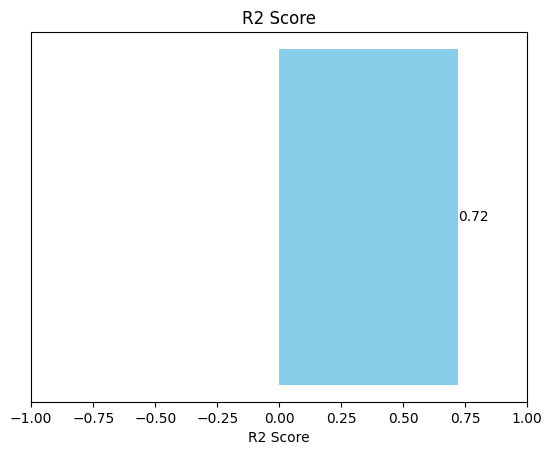

In [187]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

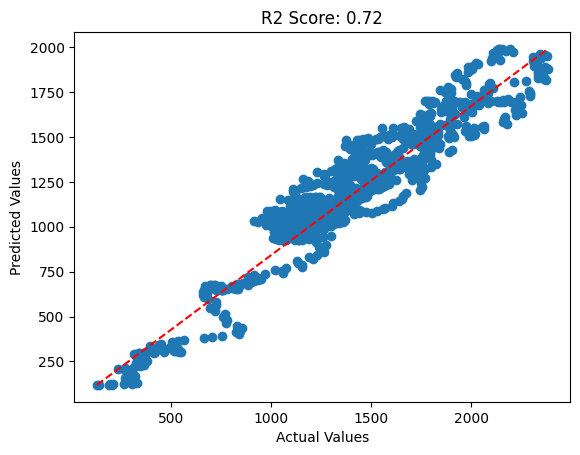

In [188]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()